In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score, f1_score
from sklearn import svm
from sklearn.svm import SVC
warnings.filterwarnings("ignore")
import sklearn
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier as knn
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
import os

In [43]:
data = pd.read_csv("C:/Users/Biggest/Downloads/breastCancerData.csv")

In [44]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
data.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
Unnamed:

In [5]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
data.drop(['Unnamed: 32', 'id'], axis = 1, inplace = True)

# 
since diagnosis is the target variable, i need to change to the datapoints to dummy values.

In [7]:
data.diagnosis=[1 if each=="M" else 0 for each in data.diagnosis]
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# BUILDING MODEL

In [8]:
y = data['diagnosis']
x_data = data.drop(['diagnosis'], axis = 1)

In [9]:
x_data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [10]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

# NORMALIZATION

In [11]:
x_data.describe(include = 'all')

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [12]:
min = np.min(x_data)

In [13]:
max = np.max(x_data)

In [14]:
x = (x_data - min / (max - min))
x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [15]:
from sklearn import preprocessing 
#returns a numpy array 
min_max_scaler = preprocessing.MinMaxScaler() 
x_scaled = min_max_scaler.fit_transform(x)

x_scaled

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

In [16]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size = 0.3, random_state = 200)


In [18]:
x_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
92,13.270,14.76,84.74,551.7,0.07355,0.05055,0.032610,0.026480,0.1386,0.05318,...,16.36,22.35,104.50,830.6,0.1006,0.1238,0.13500,0.10010,0.2027,0.06206
410,11.360,17.57,72.49,399.8,0.08858,0.05313,0.027830,0.021000,0.1601,0.05913,...,13.05,36.32,85.07,521.3,0.1453,0.1622,0.18110,0.08698,0.2973,0.07745
391,8.734,16.84,55.27,234.3,0.10390,0.07428,0.000000,0.000000,0.1985,0.07098,...,10.17,22.80,64.01,317.0,0.1460,0.1310,0.00000,0.00000,0.2445,0.08865
380,11.270,12.96,73.16,386.3,0.12370,0.11110,0.079000,0.055500,0.2018,0.06914,...,12.84,20.53,84.93,476.1,0.1610,0.2429,0.22470,0.13180,0.3343,0.09215
108,22.270,19.67,152.80,1509.0,0.13260,0.27680,0.426400,0.182300,0.2556,0.07039,...,28.40,28.01,206.80,2360.0,0.1701,0.6997,0.96080,0.29100,0.4055,0.09789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,10.080,15.11,63.76,317.5,0.09267,0.04695,0.001597,0.002404,0.1703,0.06048,...,11.87,21.18,75.39,437.0,0.1521,0.1019,0.00692,0.01042,0.2933,0.07697
219,19.530,32.47,128.00,1223.0,0.08420,0.11300,0.114500,0.066370,0.1428,0.05313,...,27.90,45.41,180.20,2477.0,0.1408,0.4097,0.39950,0.16250,0.2713,0.07568
526,13.460,18.75,87.44,551.1,0.10750,0.11380,0.042010,0.031520,0.1723,0.06317,...,15.35,25.16,101.90,719.8,0.1624,0.3124,0.26540,0.14270,0.3518,0.08665
345,10.260,14.71,66.20,321.6,0.09882,0.09159,0.035810,0.020370,0.1633,0.07005,...,10.88,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488


In [19]:
y_test

225    0
385    1
338    0
458    0
495    0
      ..
336    0
11     1
314    0
265    1
12     1
Name: diagnosis, Length: 171, dtype: int64

# RANDOM FOREST CLASSIFIER

In [20]:
RFCmodel = RandomForestClassifier(n_estimators=15, random_state=40)
# n_estimators specifies the number of trees in the forest of the model. The default value for this parameter is 10, which means that 10 different decision trees will be constructed in the random forest.
 # random_state ensures that the same randomization is used each time you run the code, resulting in the same splits of the data.
RFCmodel.fit(x_train, y_train)

RandomForestClassifier(n_estimators=15, random_state=40)

In [21]:
trainPredictions = RFCmodel.predict(x_train)
testPredictions = RFCmodel.predict(x_test)

In [22]:
print ("Accuracy: ", metrics.accuracy_score(y_test, testPredictions))
print ("Precision: ", metrics.precision_score(y_test, testPredictions))
print ("Recall: ", metrics.recall_score(y_test,testPredictions))

Accuracy:  0.9532163742690059
Precision:  0.9607843137254902
Recall:  0.8909090909090909


In [23]:
RFC_cm = cm(y_test, testPredictions)
RFC_cm

array([[114,   2],
       [  6,  49]], dtype=int64)

best n_estimators for Random Forest : 5 , best accuracy : 0.9649122807017544


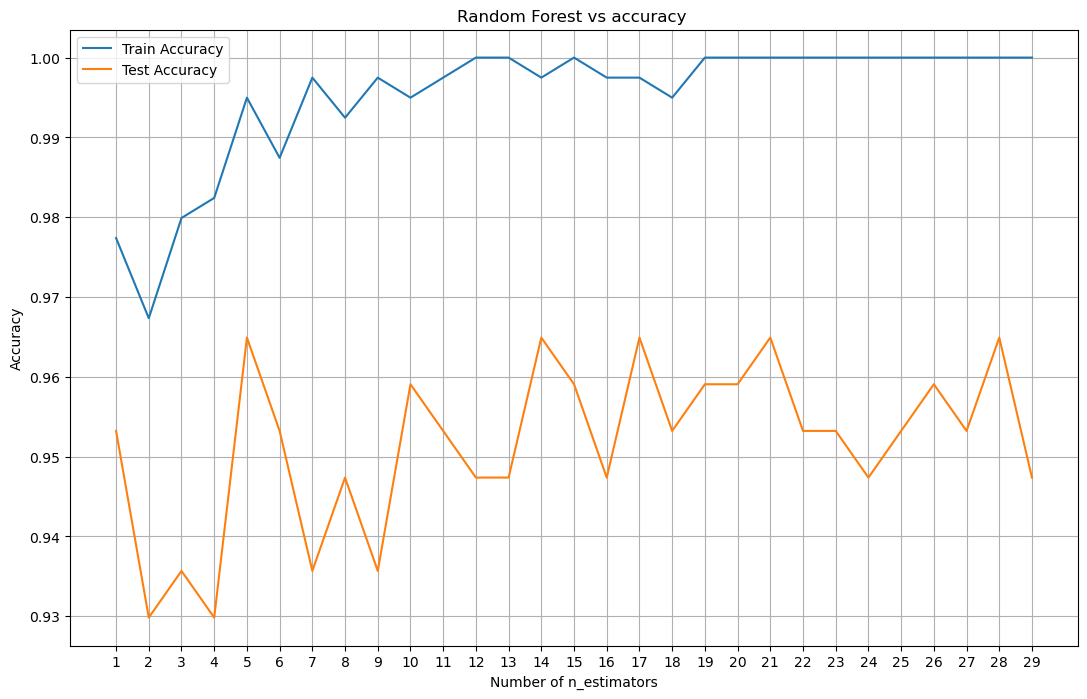

In [57]:
# find best n value for RFC
best_RFC= range(1,30) 
train_accuracy_list =[]
test_accuracy_list =[]

for each in best_RFC:
    RFCmodel = RandomForestClassifier(n_estimators=each)
    RFCmodel.fit(x_train,  y_train)
    train_accuracy_list.append( RFCmodel.score(x_train, y_train))    
    test_accuracy_list.append( RFCmodel.score(x_test, y_test))    
    
        
print( 'best n_estimators for Random Forest : {} , best accuracy : {}'.format(test_accuracy_list.index(np.max(test_accuracy_list))+1, np.max(test_accuracy_list)))
plt.figure(figsize=[13,8])
plt.plot(best_RFC, train_accuracy_list,label = 'Train Accuracy')
plt.plot(best_RFC, test_accuracy_list,label = 'Test Accuracy')
plt.title('Random Forest vs accuracy ')
plt.xlabel('Number of n_estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.xticks(best_RFC)
plt.show()

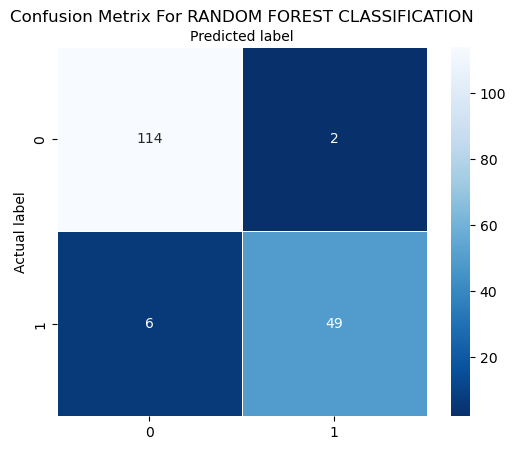

In [24]:
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(RFC_cm, annot = True, fmt = 'g', linewidth = 0.5, square = True, cmap = "Blues_r")
ax.xaxis.set_label_position("top")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.title("Confusion Metrix For RANDOM FOREST CLASSIFICATION")
plt.show()

# K-Nearest Neighbour
 * n_neighbors (default value: 5) specifies the number of nearest data points (neighbors) to use for classification or regression.
 * A smaller value of n_neighbors (e.g., 1) makes the model more sensitive to local variations in the data. It can lead to overfitting, especially if the dataset has noise or outliers. * 
A larger value of n_neighbors (e.g., 10 or more) results in a smoother decision boundary and reduces the impact of individual noisy data points
   . * 
The optimal value of n_neighbors depends on the specific problem and dataset. It’s often determined through experimentation or cross-validation.

In [25]:
knnModel = knn(n_neighbors=3)
# n_neighbors (default value: 5) specifies the number of nearest data points (neighbors) to use for classification or regression.

In [26]:
knnModel.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
correct_value = np.array(y_test)
test_Predictions = knnModel.predict(x_test)

In [ ]:
print ("Accuracy: ", metrics.accuracy_score(y_test, test_Predictions))
print ("Precision: ", metrics.precision_score(y_test, test_Predictions))
print ("Recall: ", metrics.recall_score(y_test,test_Predictions))

In [ ]:
knn_cm = cm(y_test, test_Predictions)
knn_cm

In [ ]:
# find best n value for knn
best_neig= range(1,25) 
train_accuracy_list =[]
test_accuracy_list =[]

for each in best_neig:
    knn = KNeighborsClassifier(n_neighbors = each)
    knn.fit(x_train,  y_train)
    train_accuracy_list.append( knn.score(x_train, y_train))    
    test_accuracy_list.append( knn.score(x_test, y_test))    
    
        
print( 'best k for Knn : {} , best accuracy : {}'.format(test_accuracy_list.index(np.max(test_accuracy_list))+1, np.max(test_accuracy_list)))
plt.figure(figsize=[13,8])
plt.plot(best_neig, train_accuracy_list,label = 'Train Accuracy')
plt.plot(best_neig, test_accuracy_list,label = 'Test Accuracy')
plt.title('Neighbors vs accuracy ')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.xticks(best_neig)
plt.show()

# DECISION TREE

In [35]:
DTmodel = DecisionTreeClassifier()
DTmodel.fit(x_train, y_train)

DecisionTreeClassifier()

In [36]:
Train_Predictions = DTmodel.predict(x_train)
Test_Predictions = DTmodel.predict(x_test)

In [37]:
print ("Accuracy: ", metrics.accuracy_score(y_test, Test_Predictions))
print ("Precision: ", metrics.precision_score(y_test, Test_Predictions))
print ("Recall: ", metrics.recall_score(y_test,Test_Predictions))

Accuracy:  0.9239766081871345
Precision:  0.8888888888888888
Recall:  0.8727272727272727


In [38]:
DT_cm = cm(y_test, Test_Predictions)
DT_cm

array([[110,   6],
       [  7,  48]], dtype=int64)

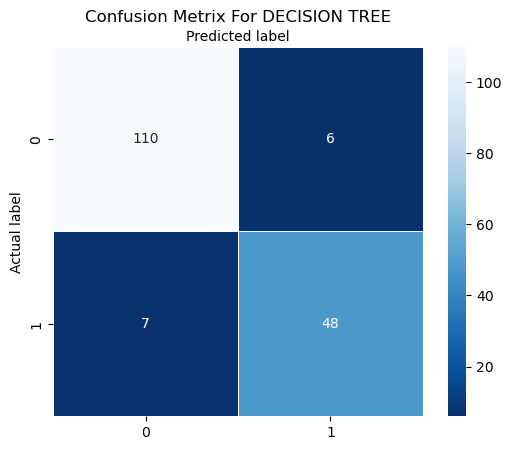

In [39]:
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(DT_cm, annot = True, fmt = 'g', linewidth = 0.5, square = True, cmap = "Blues_r")
ax.xaxis.set_label_position("top")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.title("Confusion Metrix For DECISION TREE")
plt.show()

# NAIVE BAYES

In [ ]:
NBmodel = GaussianNB()
NBmodel.fit(x_train, y_train)

In [ ]:
TrainPredictions = NBmodel.predict(x_train)
TestPredictions = NBmodel.predict(x_test)

In [ ]:
print ("Accuracy: ", metrics.accuracy_score(y_test, TestPredictions))
print ("Precision: ", metrics.precision_score(y_test, TestPredictions))
print ("Recall: ", metrics.recall_score(y_test,TestPredictions))

In [ ]:
NB_cm = cm(y_test, TestPredictions)
NB_cm

In [ ]:
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(NB_cm, annot = True, fmt = 'g', linewidth = 0.5, square = True, cmap = "Blues_r")
ax.xaxis.set_label_position("top")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.title("Confusion Metrix For NAIVE BAYSE")
plt.show()

# Support Vector Machine

In [58]:
Svm_Model = SVC()

In [59]:
Svm_Model.fit(x_train, y_train)

SVC()

In [60]:
trnPredictions = Svm_Model.predict(x_train)
tstPredictions = Svm_Model.predict(x_test)

In [61]:
print ("Accuracy: ", metrics.accuracy_score(y_test, tstPredictions))
print ("Precision: ", metrics.precision_score(y_test, tstPredictions))
print ("Recall: ", metrics.recall_score(y_test,tstPredictions))

Accuracy:  0.9005847953216374
Precision:  0.9523809523809523
Recall:  0.7272727272727273


best C for SVC : 3 , best accuracy : 0.9122807017543859


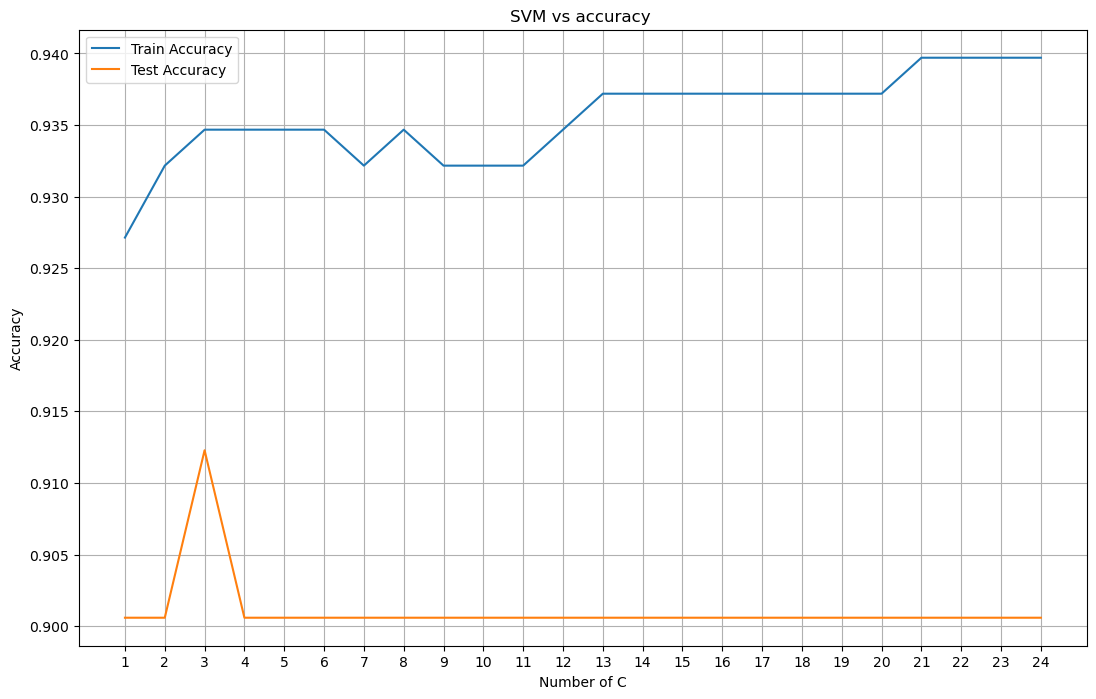

In [65]:
# find best n value for SVM
best_SVM= range(1,25) 
train_accuracy_list =[]
test_accuracy_list =[]

for each in best_neig:
    Svm_Model = SVC( C = each)
    Svm_Model.fit(x_train,  y_train)
    train_accuracy_list.append( Svm_Model.score(x_train, y_train))    
    test_accuracy_list.append( Svm_Model.score(x_test, y_test))    
    
        
print( 'best C for SVC : {} , best accuracy : {}'.format(test_accuracy_list.index(np.max(test_accuracy_list))+1, np.max(test_accuracy_list)))
plt.figure(figsize=[13,8])
plt.plot(best_SVM, train_accuracy_list,label = 'Train Accuracy')
plt.plot(best_SVM, test_accuracy_list,label = 'Test Accuracy')
plt.title('SVM vs accuracy ')
plt.xlabel('Number of C')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.xticks(best_SVM)
plt.show()

In [62]:
SVM_cm = cm(y_test, tstPredictions)
SVM_cm

array([[114,   2],
       [ 15,  40]], dtype=int64)

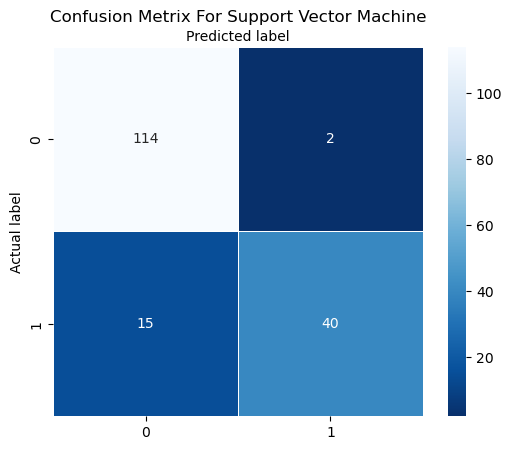

In [63]:
class_names = [0,1]

fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(SVM_cm, annot = True, fmt = 'g', linewidth = 0.5, square = True, cmap = "Blues_r")
ax.xaxis.set_label_position("top")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.title("Confusion Metrix For Support Vector Machine")
plt.show()